In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [29]:
data = pd.read_csv('train.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [30]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [32]:
data.groupby('Age')['User_ID'].nunique().sum()


5891

In [33]:
age = data.groupby('Age')['User_ID'].nunique().reset_index()
age


,Age,User_ID
0,0-17,218
1,18-25,1069
2,26-35,2053
3,36-45,1167
4,46-50,531
5,51-55,481
6,55+,372


In [34]:
#### Observation: The data has 5891 unique users, there are seven age groups in the data from 0 - 55+, Highest purchase is from range Age 26-35, which also has the highes users while least is 0-17

<Axes: xlabel='Age', ylabel='User_ID'>

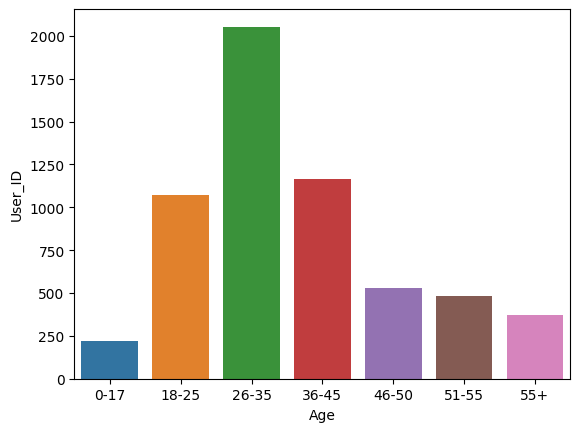

In [96]:
sns.barplot(x = 'Age', y ='User_ID', data=age, hue='Age')

In [36]:
data[['Purchase', 'Age']].groupby('Age').size().reset_index(name='Purchase_count')

,Age,Purchase_count
0,0-17,15102
1,18-25,99660
2,26-35,219587
3,36-45,110013
4,46-50,45701
5,51-55,38501
6,55+,21504


In [37]:
purchase_age = data.groupby('Age')['Purchase'].sum().reset_index()
purchase_age

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


<Axes: xlabel='Age', ylabel='Purchase'>

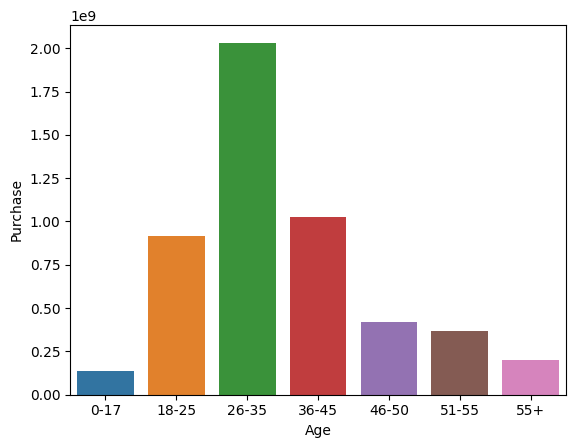

In [97]:
sns.barplot(x= 'Age', y='Purchase', data = purchase_age, hue='Age')

In [39]:
age_product= data[['Product_ID', 'Age', 'Purchase']].groupby(['Product_ID', 'Age']).sum().reset_index()
age_product.sort_values('Purchase', ascending=False)

,Product_ID,Age,Purchase
1433,P00025442,26-35,10808285
5692,P00110742,26-35,10721082
14094,P00255842,26-35,10102650
13045,P00237542,26-35,9743395
9989,P00184942,26-35,9632794
...,...,...,...
1411,P00025142,0-17,375
18526,P00336342,18-25,362
11101,P00203742,36-45,219
5933,P00114242,51-55,217


#### Gender Analysis

In [40]:
colour={'F': '#FF5733', 'M':'#2980B9'}

In [41]:
#Analysing the Gender
gender= data.groupby('Gender')['User_ID'].nunique().reset_index(name= 'Users')
gender_total =gender['Users'].sum()
gender['Percent']=(gender['Users']/gender_total *100).round(2)
gender


,Gender,Users,Percent
0,F,1666,28.28
1,M,4225,71.72


In [42]:
gender_count= data[['Purchase', 'Gender', 'Age']].groupby(['Gender', 'Age']).size().reset_index(name='Purchase_count')
gender_count

,Gender,Age,Purchase_count
0,F,0-17,5083
1,F,18-25,24628
2,F,26-35,50752
3,F,36-45,27170
4,F,46-50,13199
5,F,51-55,9894
6,F,55+,5083
7,M,0-17,10019
8,M,18-25,75032
9,M,26-35,168835


<Axes: xlabel='Age', ylabel='Purchase_count'>

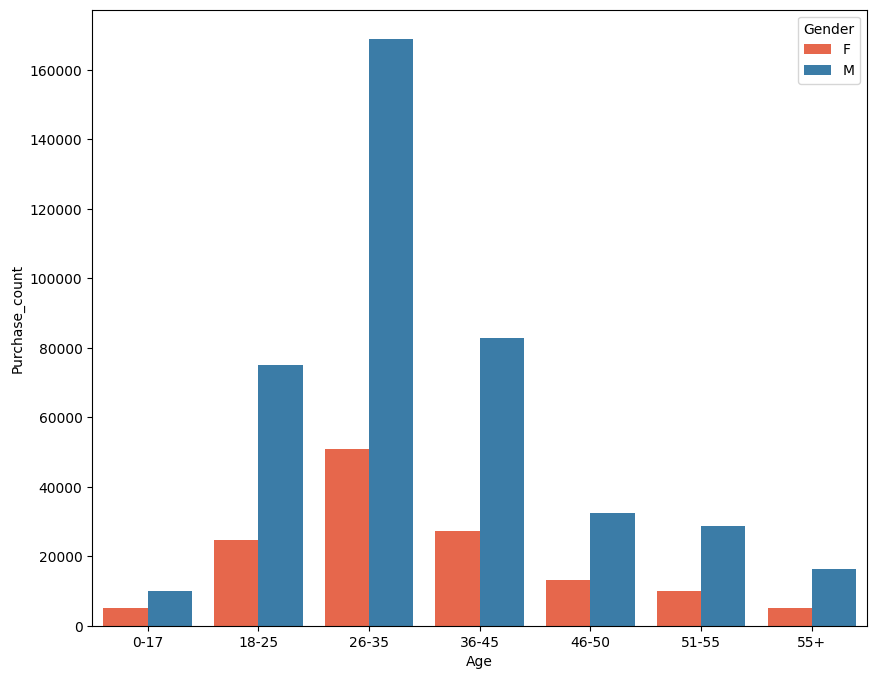

In [43]:
plt.figure(figsize= (10, 8))
sns.barplot(x='Age', y ='Purchase_count', hue= 'Gender', data =gender_count, palette =colour)

In [44]:
gender_purchase = data.groupby('Gender')['Purchase'].sum().reset_index(name='Total_Purchase')
gender_purchase

,Gender,Total_Purchase
0,F,1186232642
1,M,3909580100


Text(0.5, 1.0, 'Total Purchase by each Gender')

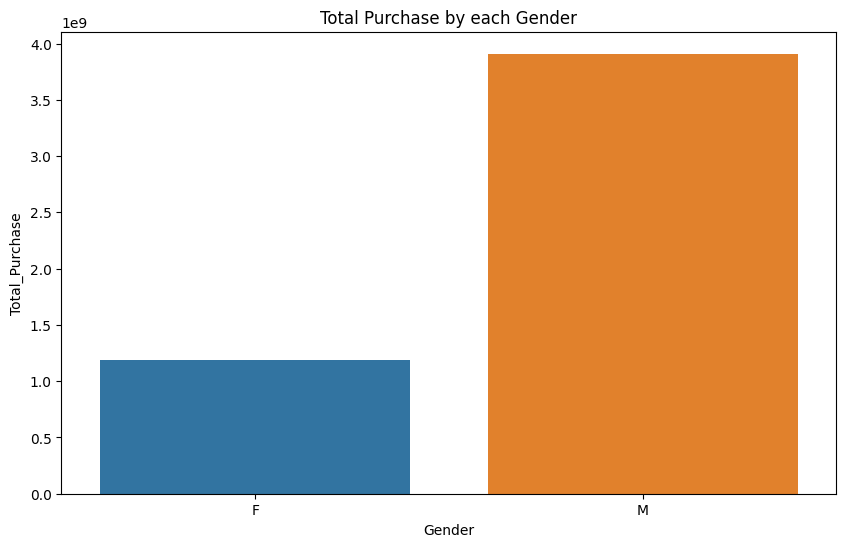

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y= 'Total_Purchase', data=gender_purchase, hue ='Gender')
plt.title('Total Purchase by each Gender')

In [46]:
gender_product= data[['Product_ID', 'Gender', 'Purchase']].groupby(['Product_ID', 'Gender']).sum().reset_index()
age_product.sort_values('Purchase', ascending=False)

,Product_ID,Age,Purchase
1433,P00025442,26-35,10808285
5692,P00110742,26-35,10721082
14094,P00255842,26-35,10102650
13045,P00237542,26-35,9743395
9989,P00184942,26-35,9632794
...,...,...,...
1411,P00025142,0-17,375
18526,P00336342,18-25,362
11101,P00203742,36-45,219
5933,P00114242,51-55,217


#### Observation: The data has 1666 F customers, which is 28% of the total data, and 225 M customers, which represents 72%. The total purchase by M is about 3.9Billion while F is about 1.2B. The highest Purchase age is 26-35 while lowest is 0-17

 #### Occupation Analysis

In [47]:
occupation= data.groupby('Occupation')['User_ID'].nunique().reset_index(name='Count')
occupation.sort_values('Count')

,Occupation,Count
8,8,17
18,18,67
19,19,71
9,9,88
5,5,111
11,11,128
15,15,140
13,13,140
3,3,170
10,10,192


In [48]:
occupation_count= data[['Age', 'Occupation', 'Purchase', 'Gender']].groupby(['Age','Gender','Occupation']).size().reset_index(name='Purchase_count')
occupation_count.sort_values('Purchase_count', ascending=False).reset_index()

,index,Age,Gender,Occupation,Purchase_count
0,41,18-25,M,4,36078
1,75,26-35,M,0,26124
2,82,26-35,M,7,18906
3,79,26-35,M,4,17020
4,120,36-45,M,7,16402
...,...,...,...,...,...
236,192,51-55,M,4,25
237,13,0-17,M,11,18
238,15,0-17,M,13,15
239,226,55+,M,5,15


In [49]:
occupation_count[occupation_count['Occupation'] == 8]

,Age,Gender,Occupation,Purchase_count
11,0-17,M,8,29
45,18-25,M,8,14
83,26-35,M,8,378
103,36-45,F,8,39
121,36-45,M,8,59
159,46-50,M,8,549
178,51-55,F,8,280
196,51-55,M,8,37
213,55+,F,8,42
229,55+,M,8,119


<Axes: xlabel='Occupation', ylabel='Purchase_count'>

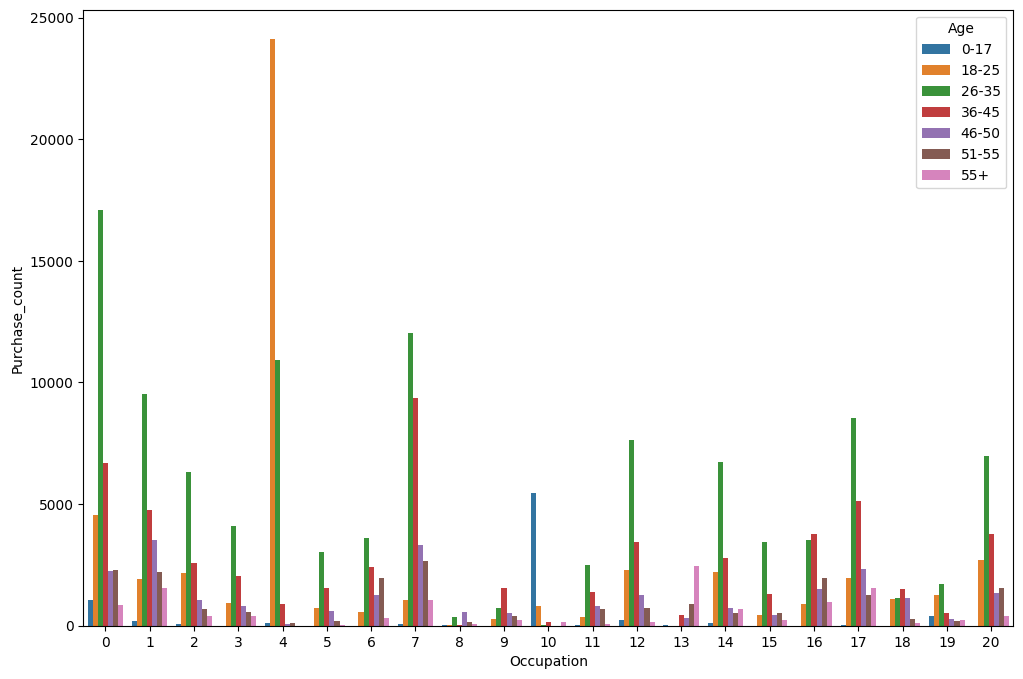

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Purchase_count',  hue ='Age',  data =occupation_count, errorbar=None)

In [51]:
purchase_occupation= data.groupby('Occupation')['Purchase'].sum().reset_index()
purchase_occupation.sort_values('Purchase', ascending=False).head(10)


,Occupation,Purchase
4,4,666244484
0,0,635406958
7,7,557371587
1,1,424614144
17,17,393281453
12,12,305449446
20,20,296570442
14,14,259454692
16,16,238346955
2,2,238028583


<Axes: xlabel='Occupation', ylabel='Purchase'>

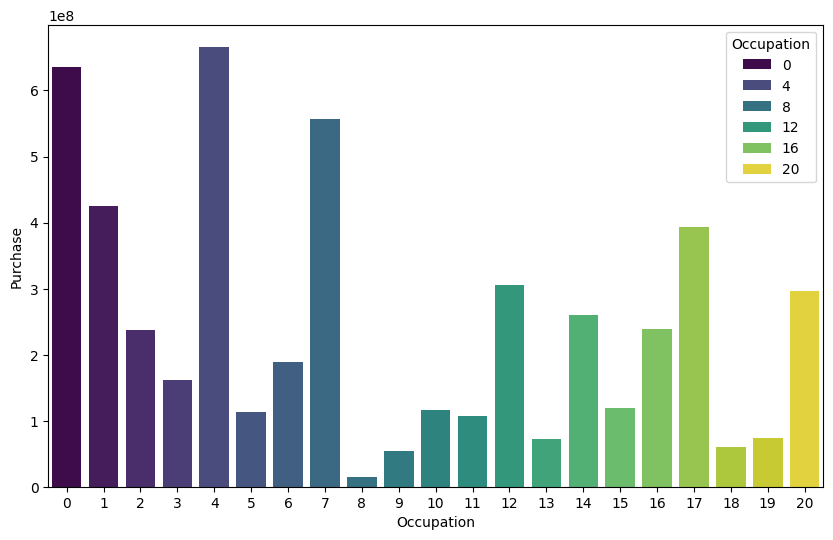

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Purchase', data=purchase_occupation, hue='Occupation', palette='viridis')

#### Observation: Occupation 4 has the highest amount Purchases, 666 Million, with 740 Customers and the highest age range of 18-25, while occupation 8 has the least Purchase 15Million, with 17customers and the highest age range of 46-50

#### Marital Analysis

In [53]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [54]:
marital= data.groupby('Marital_Status')['User_ID'].nunique().reset_index(name= 'Users')
marital_total =marital['Users'].sum()
marital['Percent']=(marital['Users']/marital_total *100).round(2)
marital


,Marital_Status,Users,Percent
0,0,3417,58.0
1,1,2474,42.0


In [55]:
marital_count= data[['Purchase', 'Marital_Status', 'Age']].groupby(['Marital_Status', 'Age']).size().reset_index(name='Purchase_count')
marital_count

,Marital_Status,Age,Purchase_count
0,0,0-17,15102
1,0,18-25,78544
2,0,26-35,133296
3,0,36-45,66377
4,0,46-50,12690
5,0,51-55,10839
6,0,55+,7883
7,1,18-25,21116
8,1,26-35,86291
9,1,36-45,43636


<Axes: xlabel='Age', ylabel='Purchase_count'>

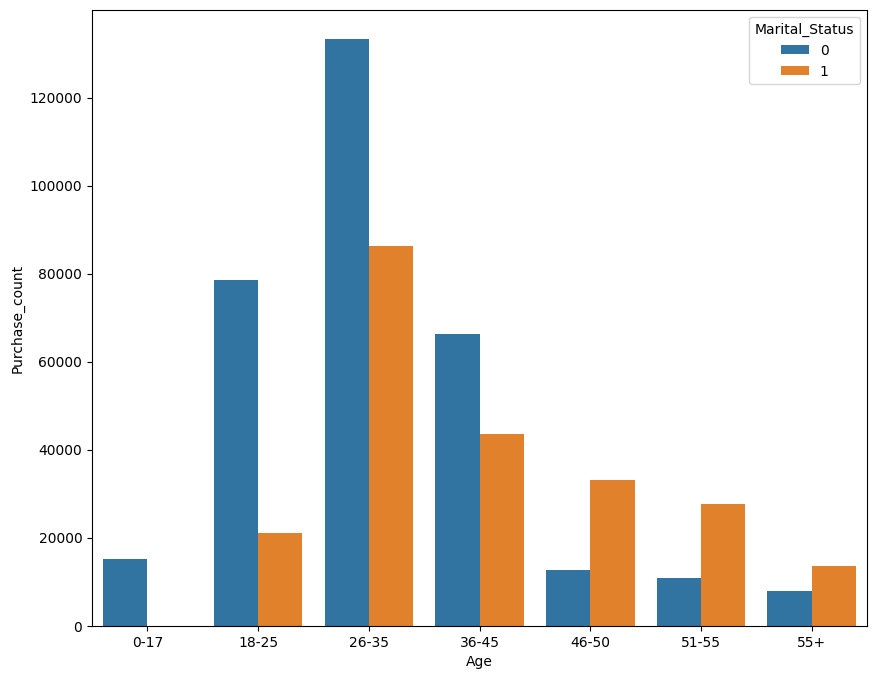

In [56]:
plt.figure(figsize= (10, 8))
sns.barplot(x='Age', y ='Purchase_count', hue= 'Marital_Status', data =marital_count)

In [57]:
marital_purchase = data.groupby('Marital_Status')['Purchase'].sum().reset_index(name='Total_Purchase')
marital_purchase

,Marital_Status,Total_Purchase
0,0,3008927447
1,1,2086885295


Text(0.5, 1.0, 'Marital Status Total Purchase')

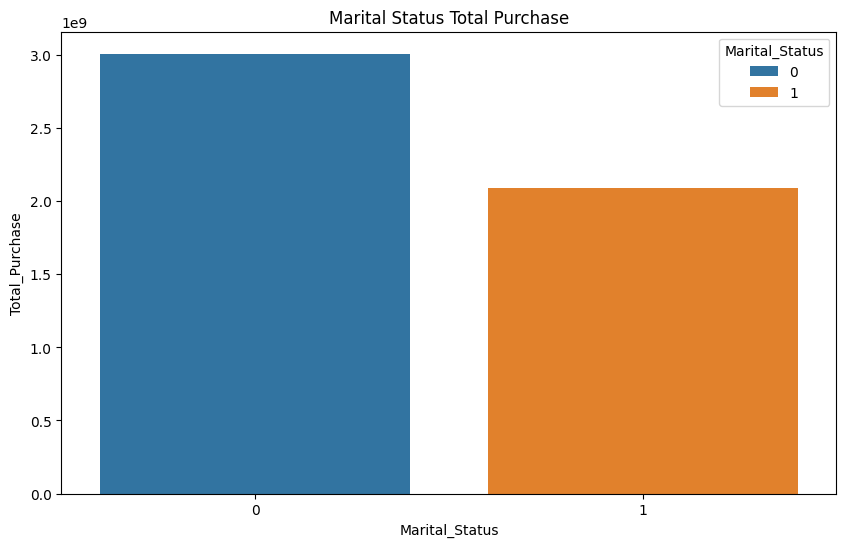

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(x='Marital_Status', y= 'Total_Purchase', data=marital_purchase , hue='Marital_Status')
plt.title('Marital Status Total Purchase')

#### Observation: Unmarried are the largest customer base with 58% with purchase total of 3.9B  while Married is 42% with 2.1B. both with highest age range with age range of 26-35 and lowest 55+

#### City Category Analysis

In [59]:
city = data.groupby('City_Category')['User_ID'].nunique().reset_index(name= 'Users')
city_total =city['Users'].sum()
city['Percent']=(city['Users']/city_total *100).round(2)
city

,City_Category,Users,Percent
0,A,1045,17.74
1,B,1707,28.98
2,C,3139,53.28


In [60]:
data.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [61]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [62]:
citys= data[['Purchase', 'City_Category', 'Age', 'Marital_Status','Stay_In_Current_City_Years']].groupby(['City_Category', 'Stay_In_Current_City_Years', 'Age','Marital_Status']).sum().reset_index()
citys

,City_Category,Stay_In_Current_City_Years,Age,Marital_Status,Purchase
0,A,0,0-17,0,2508751
1,A,0,18-25,0,36288576
2,A,0,18-25,1,6148645
3,A,0,26-35,0,60379996
4,A,0,26-35,1,52352161
...,...,...,...,...,...
188,C,4+,46-50,1,23216685
189,C,4+,51-55,0,7336511
190,C,4+,51-55,1,17478938
191,C,4+,55+,0,4619909


<Axes: xlabel='City_Category', ylabel='Purchase'>

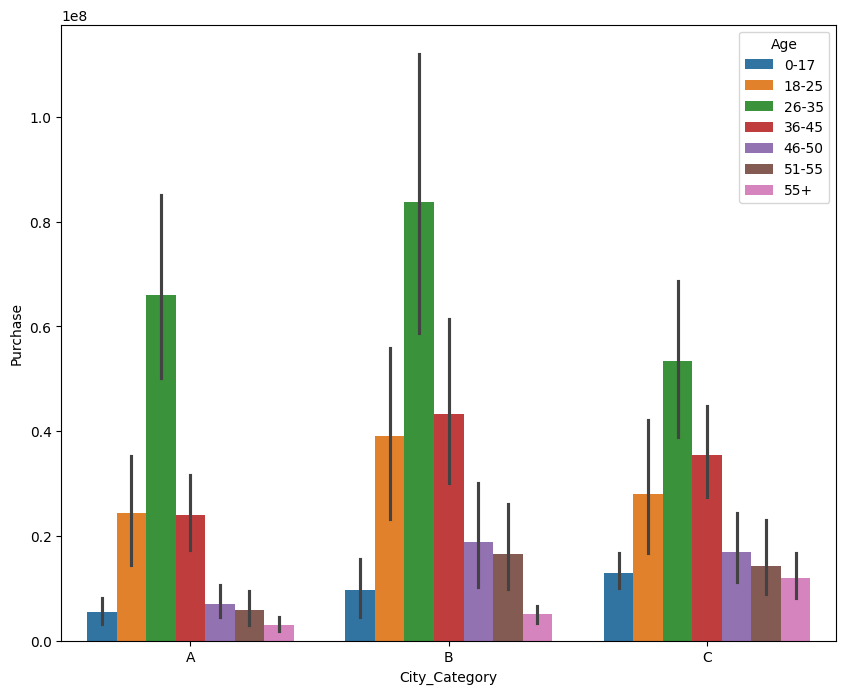

In [63]:
plt.figure(figsize= (10, 8))
sns.barplot(x='City_Category', y ='Purchase', hue= 'Age', data= citys)

<Axes: xlabel='City_Category', ylabel='Purchase'>

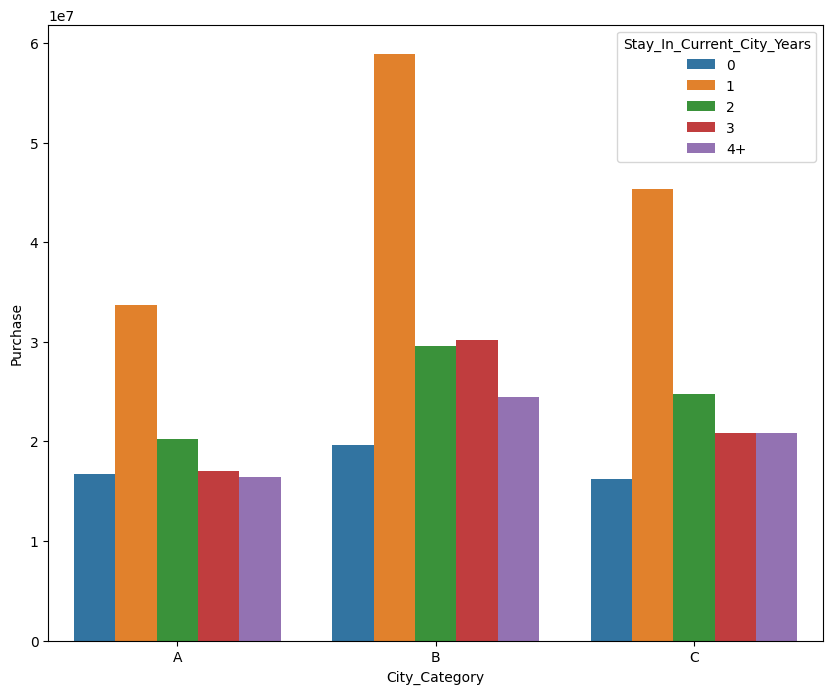

In [64]:
plt.figure(figsize= (10, 8))
sns.barplot(x='City_Category', y ='Purchase', hue= 'Stay_In_Current_City_Years', data =citys, errorbar=None)

<Axes: xlabel='City_Category', ylabel='Purchase'>

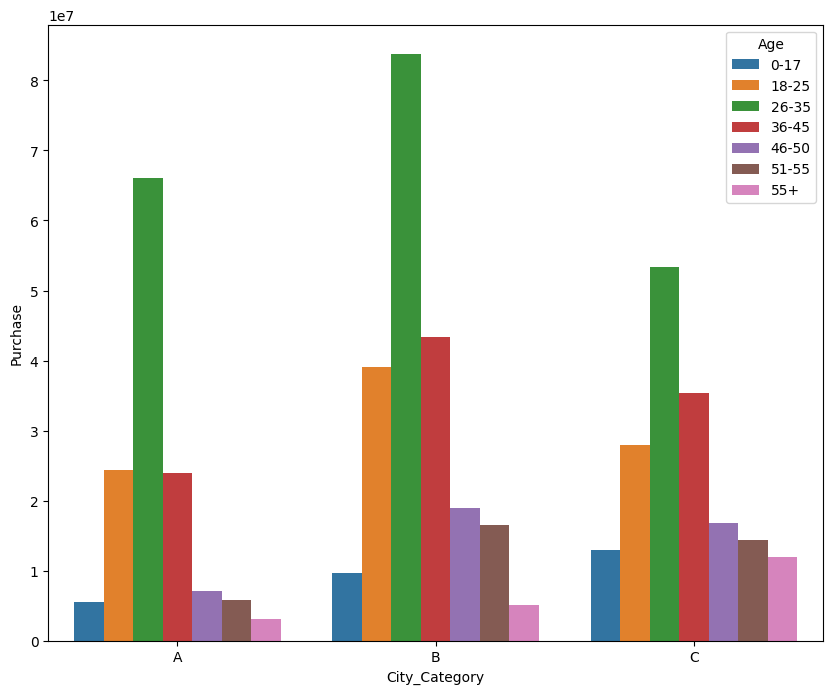

In [65]:
plt.figure(figsize= (10, 8))
sns.barplot(x='City_Category', y ='Purchase', hue= 'Age', data =citys, errorbar=None)

Observation: Three Cities has more customers with age bracket(26-35), followed by 36-45 in city B and C while city has more purchase from (18-25)followed closely by (36-45).

In [66]:
#plt.figure(figsize= (10, 8))
#sns.barplot(x='City_Category', y ='Purchase_count', hue= 'Stay_In_Current_City_Years', data =city_count, errorbar=None)

In [67]:
city_purchase = data.groupby('City_Category')['Purchase'].sum().reset_index(name='Total_Purchase')
city_purchase 

,City_Category,Total_Purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


Text(0.5, 1.0, 'City Total Purchase')

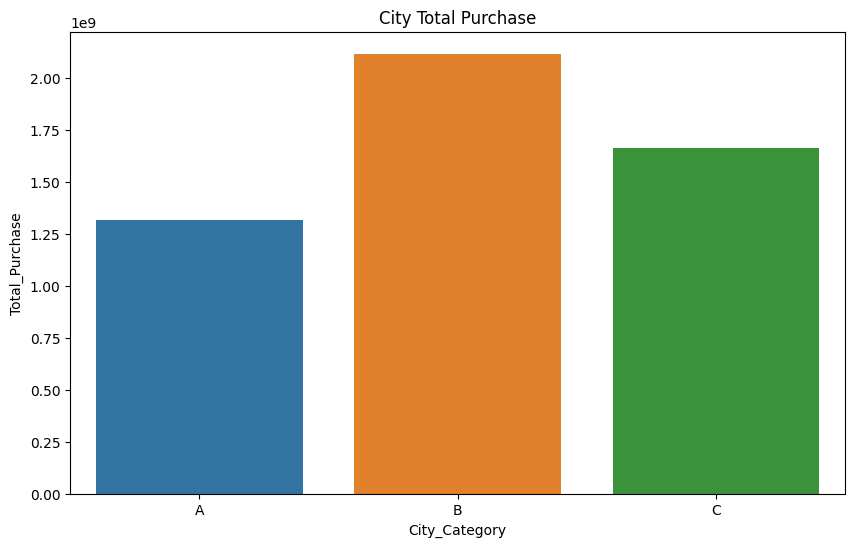

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(x='City_Category', y= 'Total_Purchase', data=city_purchase, hue='City_Category')
plt.title('City Total Purchase')

#### Observation: The store is located in 3 cities.  B with 29% customers has total purchase of 2.1B,  A with 17% customers has total purchase 1.7B and C with largest percentage of 53% has total purchase of 1.32B .

#### Product Analysis

In [69]:
data.Product_ID.nunique()

3631

In [70]:
data.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [71]:
product_purchase= data.groupby('Product_ID')['Purchase'].sum().reset_index()
product_purchase

,Product_ID,Purchase
0,P00000142,12837476
1,P00000242,3967496
2,P00000342,1296475
3,P00000442,441173
4,P00000542,807212
...,...,...
3626,P0099442,2870383
3627,P0099642,83710
3628,P0099742,991948
3629,P0099842,737312


In [72]:
#### The store has a total of 3631 unique products

<Axes: xlabel='City_Category', ylabel='Purchase'>

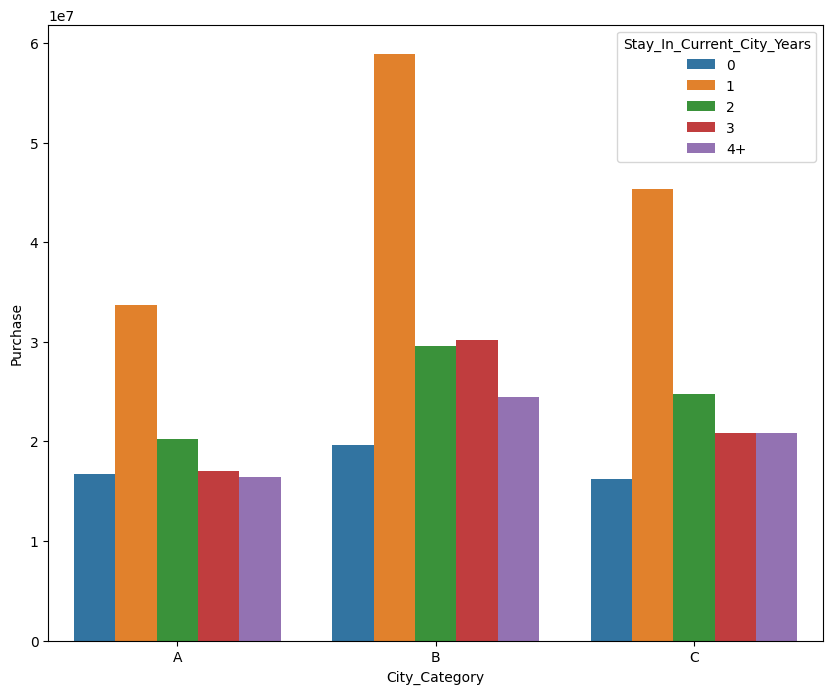

In [75]:
plt.figure(figsize= (10, 8))
sns.barplot(x='City_Category', y ='Purchase', hue= 'Stay_In_Current_City_Years', data =citys, errorbar=None)

#### Highest purchased products based on City

In [89]:
products_city= data[['Product_ID','Product_Category_1', 'Product_Category_2', 'Purchase','City_Category']].groupby(['Product_ID', 'City_Category']).sum().reset_index()
products_city =products_city.sort_values('Purchase', ascending=False).reset_index()
products_city

,level_0,index,Product_ID,City_Category,Product_Category_1,Product_Category_2,Purchase
0,0,715,P00025442,C,731,1462.0,12658553
1,1,2852,P00110742,C,695,1390.0,11343506
2,2,6956,P00255842,C,9744,0.0,11274250
3,3,2894,P00112142,C,717,1434.0,11207578
4,4,4946,P00184942,C,648,5184.0,11137180
...,...,...,...,...,...,...,...
10316,10316,8415,P00309042,B,12,0.0,726
10317,10317,2605,P00101642,C,12,0.0,699
10318,10318,2503,P00091742,C,13,0.0,405
10319,10319,5482,P00203742,B,13,16.0,219


In [90]:
products= data[['Product_ID','Product_Category_1', 'Product_Category_2', 'Purchase']].groupby('Product_ID').sum().reset_index()
products =products.sort_values('Purchase', ascending=False).reset_index()
products

,index,Product_ID,Product_Category_1,Product_Category_2,Purchase
0,249,P00025442,1615,3230.0,27995166
1,1016,P00110742,1612,3224.0,26722309
2,2443,P00255842,22128,0.0,25168963
3,582,P00059442,8436,11248.0,24338343
4,1745,P00184942,1440,11520.0,24334887
...,...,...,...,...,...
3626,125,P00012942,5,8.0,1717
3627,3117,P00325342,11,0.0,1656
3628,3389,P00353042,11,0.0,1545
3629,2962,P00309042,12,0.0,726


### Best 50 products with highest purchase.

In [91]:
product_50 =products.head(50)
product_50.reset_index()

,level_0,index,Product_ID,Product_Category_1,Product_Category_2,Purchase
0,0,249,P00025442,1615,3230.0,27995166
1,1,1016,P00110742,1612,3224.0,26722309
2,2,2443,P00255842,22128,0.0,25168963
3,3,582,P00059442,8436,11248.0,24338343
4,4,1745,P00184942,1440,11520.0,24334887
5,5,1030,P00112142,1562,3124.0,24216006
6,6,1018,P00110942,1360,2720.0,23639564
7,7,2263,P00237542,1394,20910.0,23425576
8,8,565,P00057642,1470,22050.0,23102780
9,9,104,P00010742,1350,10800.0,22164153


In [108]:
product_20 =products.head(20)
product_20.reset_index()

,level_0,index,Product_ID,Product_Category_1,Product_Category_2,Purchase
0,0,249,P00025442,1615,3230.0,27995166
1,1,1016,P00110742,1612,3224.0,26722309
2,2,2443,P00255842,22128,0.0,25168963
3,3,582,P00059442,8436,11248.0,24338343
4,4,1745,P00184942,1440,11520.0,24334887
5,5,1030,P00112142,1562,3124.0,24216006
6,6,1018,P00110942,1360,2720.0,23639564
7,7,2263,P00237542,1394,20910.0,23425576
8,8,565,P00057642,1470,22050.0,23102780
9,9,104,P00010742,1350,10800.0,22164153


In [92]:
products[products['Product_ID'] =='P00370853']

,index,Product_ID,Product_Category_1,Product_Category_2,Purchase
3250,3565,P00370853,15542,0.0,30588


<Axes: xlabel='Purchase', ylabel='Product_ID'>

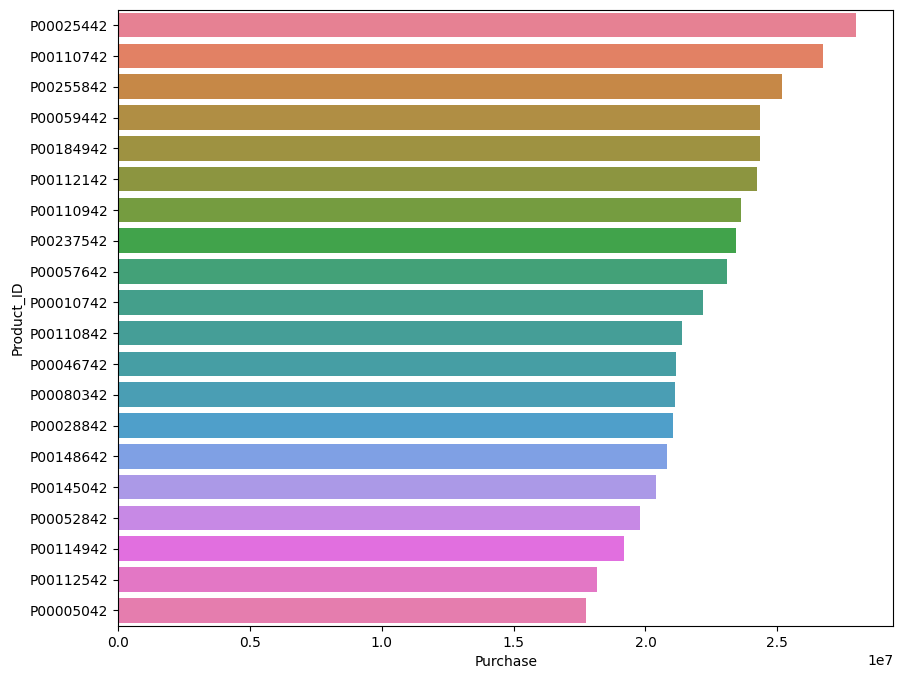

In [109]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Product_ID', x='Purchase', data=product_20, orient ='h', hue = 'Product_ID')